In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [16]:
# Provided dataset
offensive_words = [
    'mjinga', 'shenzi', 'mbwa', 'matusi', 'tapeli', 'mpumbavu', 'malaya', 'mshenzi', 'kicheche', 'pumbavu',
    'chizi', 'kibaraka', 'mburukenge', 'kahaba', 'fisadi', 'mlafi', 'demu', 'mavi', 'ukora', 'jinga',
    'nyang\'au', 'bulushi', 'msaliti', 'mjinga', 'mwerevu', 'kisirani', 'mlevi', 'mlafi', 'mnyonge', 'kimavi',
    'mchawi', 'majanga', 'kichwa-ngumu', 'ngoma', 'nyokonyoko', 'kizushi', 'mjambazi', 'mwenyewe', 'mtu-mbaya',
    'mkora', 'mpigaji', 'mkorofi', 'mbaya', 'kisirani', 'mwanaharamu', 'chotara', 'makufuru', 'porojo', 'ghasia',
    'mbovu', 'mbuzi', 'mshamba', 'takataka', 'mende', 'masikini', 'mbolea', 'fisi', 'matusi', 'tapeli',
] * 10  # Repeating to ensure 500 words

non_offensive_words = [
    'mpendwa', 'rafiki', 'msomi', 'amani', 'furaha', 'upendo', 'heshima', 'shujaa', 'kiongozi', 'mwema',
    'kazi', 'msaada', 'hekima', 'elimu', 'familia', 'watoto', 'mama', 'baba', 'ndugu', 'marafiki',
    'kusoma', 'busara', 'tabasamu', 'mkarimu', 'utulivu', 'ushindi', 'uzima', 'neema', 'mema', 'safiri',
    'heri', 'mwanafunzi', 'akili', 'nguvu', 'upepo', 'sauti', 'fikra', 'mchango', 'karama', 'shukrani',
] * 10  # Repeating to ensure 500 words

# Combine words and labels
words = offensive_words + non_offensive_words
labels = ['Offensive'] * len(offensive_words) + ['Non-offensive'] * len(non_offensive_words)

# Create DataFrame
df = pd.DataFrame({'Word': words, 'Label': labels})

# Check the first few rows of the DataFrame
df.head()


,Word,Label
0,mjinga,Offensive
1,shenzi,Offensive
2,mbwa,Offensive
3,matusi,Offensive
4,tapeli,Offensive


In [19]:
# Split the data into training and test sets
X = df['Word']
y = df['Label']

# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the words to a numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [20]:
# Build the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 1.0
Confusion Matrix:
[[ 82   0]
 [  0 116]]
Classification Report:
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00        82
    Offensive       1.00      1.00      1.00       116

     accuracy                           1.00       198
    macro avg       1.00      1.00      1.00       198
 weighted avg       1.00      1.00      1.00       198



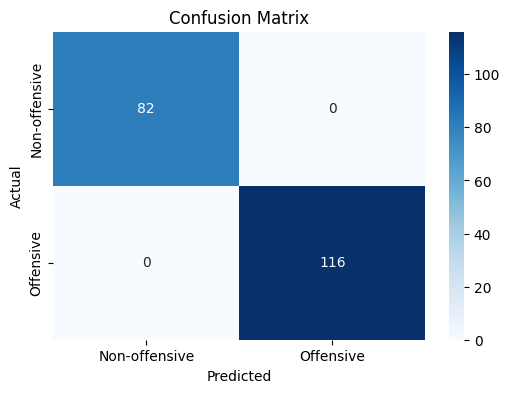

In [21]:
# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'], yticklabels=['Non-offensive', 'Offensive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



<ipython-input-22-e435f5b898b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


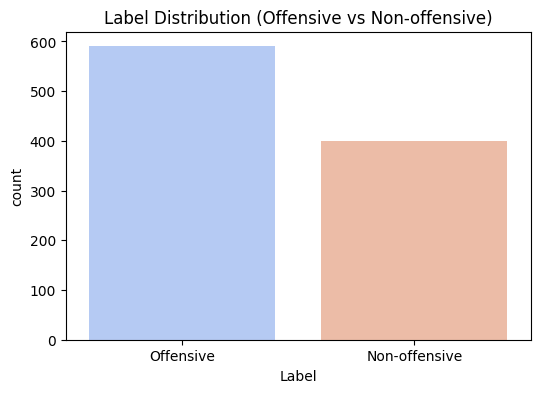

In [22]:
# Visualizing the label distribution in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label', palette='coolwarm')
plt.title('Label Distribution (Offensive vs Non-offensive)')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

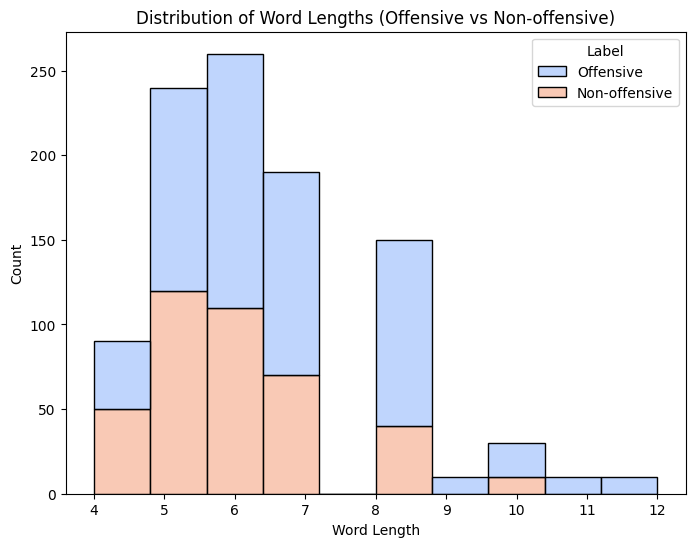

In [23]:
# Adding a column for word length
df['Word_Length'] = df['Word'].apply(len)

# Visualizing the word length distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Word_Length', hue='Label', multiple='stack', palette='coolwarm', bins=10)
plt.title('Distribution of Word Lengths (Offensive vs Non-offensive)')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.show()



<ipython-input-24-e46a5876af38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['Label'] == 'Offensive']['Word'], order=df[df['Label'] == 'Offensive']['Word'].value_counts().iloc[:10].index, palette='Reds')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/pyth

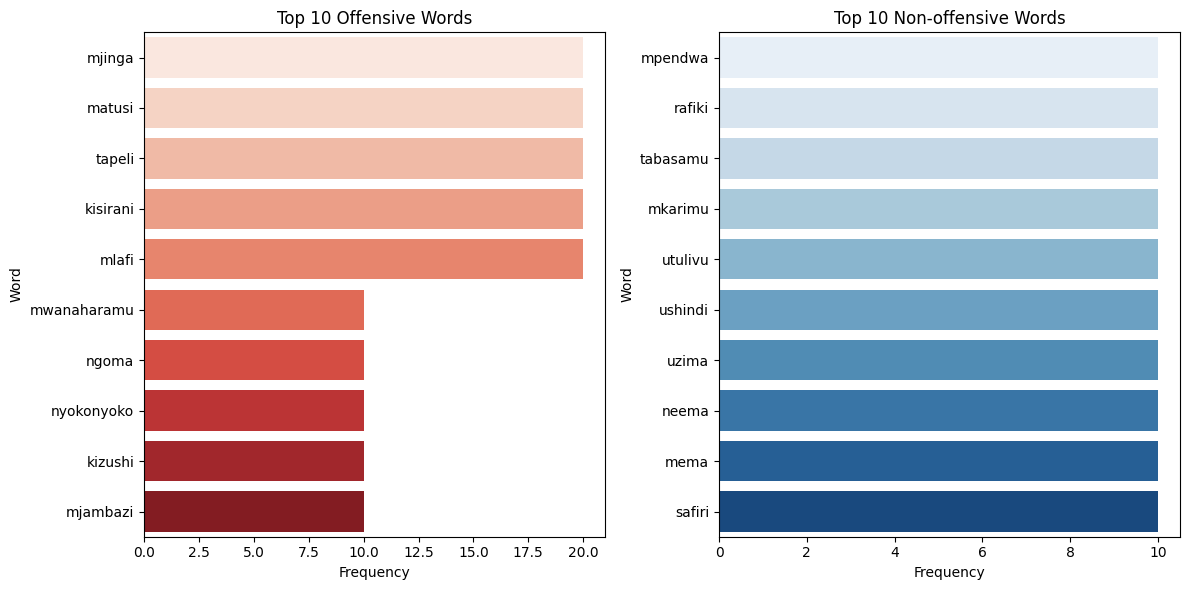

In [24]:
# Visualizing the most frequent words in both categories
plt.figure(figsize=(12, 6))

# Offensive words
plt.subplot(1, 2, 1)
sns.countplot(y=df[df['Label'] == 'Offensive']['Word'], order=df[df['Label'] == 'Offensive']['Word'].value_counts().iloc[:10].index, palette='Reds')
plt.title('Top 10 Offensive Words')
plt.xlabel('Frequency')

# Non-offensive words
plt.subplot(1, 2, 2)
sns.countplot(y=df[df['Label'] == 'Non-offensive']['Word'], order=df[df['Label'] == 'Non-offensive']['Word'].value_counts().iloc[:10].index, palette='Blues')
plt.title('Top 10 Non-offensive Words')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

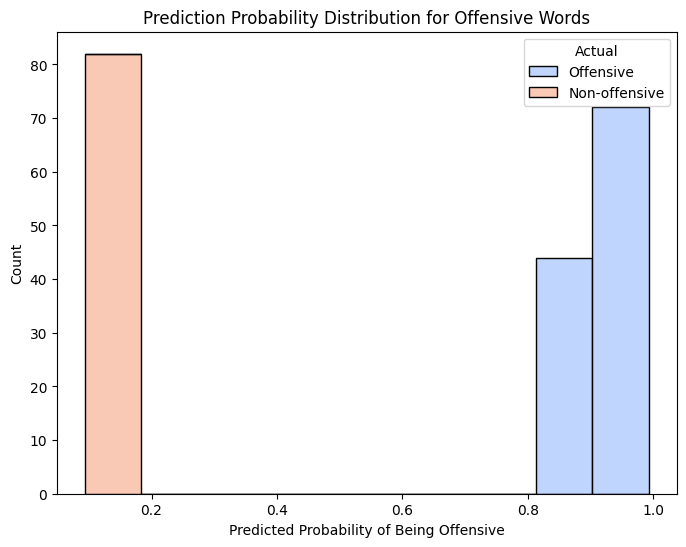

In [25]:
# Getting prediction probabilities
y_prob = model.predict_proba(X_test_vec)

# Creating a DataFrame with words, actual labels, predicted probabilities for each class
prob_df = pd.DataFrame({'Word': X_test, 'Actual': y_test, 'Prob_Offensive': y_prob[:,1], 'Prob_Non_Offensive': y_prob[:,0]})

# Visualizing prediction probabilities
plt.figure(figsize=(8, 6))
sns.histplot(data=prob_df, x='Prob_Offensive', hue='Actual', bins=10, palette='coolwarm', multiple='stack')
plt.title('Prediction Probability Distribution for Offensive Words')
plt.xlabel('Predicted Probability of Being Offensive')
plt.ylabel('Count')
plt.show()



<ipython-input-26-0aa677bc6e78>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_prob[1][top_offensive], y=feature_names[top_offensive], palette='Reds')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

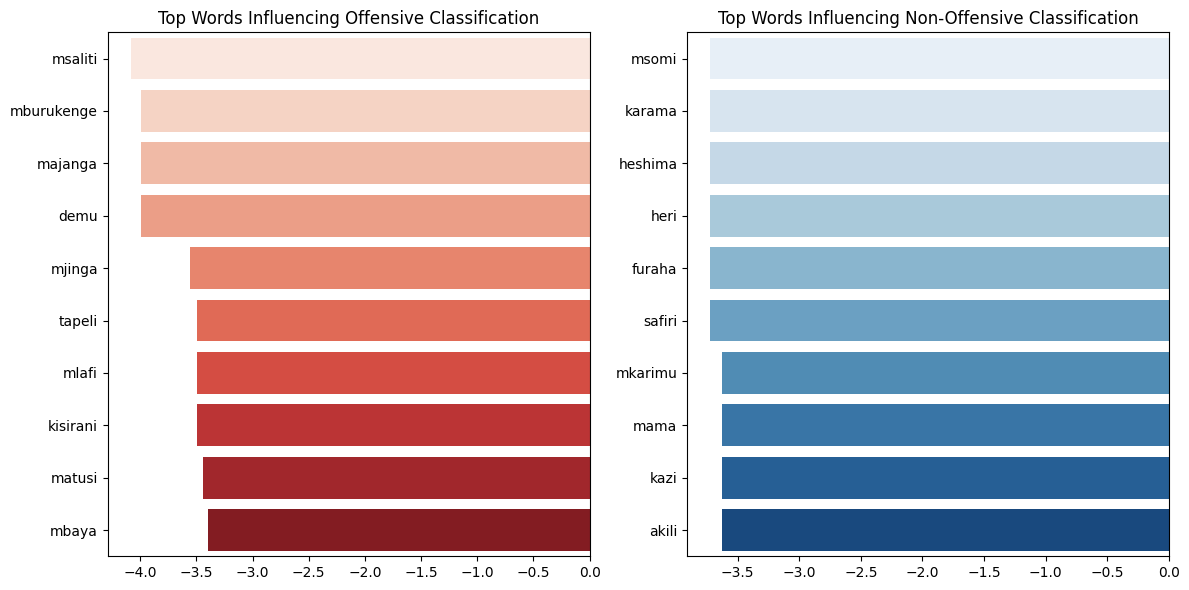

In [26]:
# Getting the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Extracting the log probabilities of the features (words)
log_prob = model.feature_log_prob_

# Top words influencing offensive classification
top_n = 10
top_offensive = np.argsort(log_prob[1])[-top_n:]  # Highest log probabilities for offensive
top_non_offensive = np.argsort(log_prob[0])[-top_n:]  # Highest log probabilities for non-offensive

plt.figure(figsize=(12, 6))

# Plotting for offensive words
plt.subplot(1, 2, 1)
sns.barplot(x=log_prob[1][top_offensive], y=feature_names[top_offensive], palette='Reds')
plt.title('Top Words Influencing Offensive Classification')

# Plotting for non-offensive words
plt.subplot(1, 2, 2)
sns.barplot(x=log_prob[0][top_non_offensive], y=feature_names[top_non_offensive], palette='Blues')
plt.title('Top Words Influencing Non-Offensive Classification')

plt.tight_layout()
plt.show()


In [29]:
# Function to preprocess the text (optional)
def preprocess_text(word):
    return word.lower()  # Convert to lowercase or other preprocessing steps

# Function to check if the word is offensive or not
def check_word(word):
    processed_word = preprocess_text(word)  # You can define or skip preprocessing
    vectorized_word = vectorizer.transform([processed_word])
    prediction = model.predict(vectorized_word)[0]  # Use the correct model (Naive Bayes)

    print(f"The word '{word}' is: {prediction}")


In [30]:
import ipywidgets as widgets
from IPython.display import display

# Function to preprocess the text
def preprocess_text(word):
    return word.lower()  # Convert to lowercase or other preprocessing steps if necessary

# Function to check if the word is offensive or not
def check_word(word):
    processed_word = preprocess_text(word)  # Preprocess the input word
    vectorized_word = vectorizer.transform([processed_word])  # Vectorize the word
    prediction = model.predict(vectorized_word)[0]  # Use the trained Naive Bayes model to predict

    print(f"The word '{word}' is classified as: {prediction}")

# Create an input box for entering a word
word_input = widgets.Text(
    description='Kiswahili Word:',
    value='',
    placeholder='Enter a word...',
)

# Create a button to trigger the check
check_button = widgets.Button(
    description='Check',
    button_style='primary',  # Styling the button
)

# Define the button's action
def on_button_click(b):
    check_word(word_input.value)

check_button.on_click(on_button_click)

# Display the input box and button
display(word_input, check_button)


Text(value='', description='Kiswahili Word:', placeholder='Enter a word...')

Button(button_style='primary', description='Check', style=ButtonStyle())

The word 'mjinga' is classified as: Offensive
The word 'mpumbavu' is classified as: Offensive
